<a href="https://colab.research.google.com/github/Aldo380/proyectoFinal/blob/main/Ejercicio3_VideoGameClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Clasificar videojuegos como "muy populares", "moderadamente populares"
##o menos populares; basándose en ventas., calificaciones y datos de usuarios activos.



##1. Limpiar Datos.
##2. Analiar variables más importantes para clasificación.
##3. Aplicar Random Forest para clasificar, analizar la importancia de las caracte´rísticas.
##5.Presentar gráficos y análisis.

In [14]:
import kagglehub
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
# Download latest version
dataset_path = kagglehub.dataset_download("asaniczka/video-game-sales-2024")

files_in_dataset = os.listdir(dataset_path)
print(f"Files in dataset directory: {files_in_dataset}")

# Check if the expected CSV file is present
# The expected file name is now "vgchartz-2024.csv"
expected_csv_file_name = 'vgchartz-2024.csv'
if expected_csv_file_name in files_in_dataset:
    # Construct the correct file path
    file_path = os.path.join(dataset_path, expected_csv_file_name)
    # Read the CSV file
    data = pd.read_csv(file_path, encoding = "latin-1")
else:
    print(f"Error: CSV file '{expected_csv_file_name}' not found in the downloaded dataset.")
    # Handle the error appropriately, e.g., raise an exception
    raise FileNotFoundError(f"CSV file '{expected_csv_file_name}' not found in '{dataset_path}'")

Files in dataset directory: ['vgchartz-2024.csv']


##1. Limpiando datos; Training and test set.

##1.1 Análisis exploratorio de datos:

##Train features(input variables): total_sales, critic_score, last_update

In [15]:
X = data[["total_sales", "critic_score", "last_update"]]


##Classification labels; como no están en nuestro dataframe; procedemos a agregarlas,:

In [18]:
y = data[["Populares", "moderadamentePopulares"]]
#f(X)-> f("total_sales", "critic_score", "lastUpdate")

KeyError: "None of [Index(['Populares', 'moderadamentePopulares'], dtype='object')] are in the [columns]"

In [17]:
#Dtat splitting. Randomstate; consistent splitting.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% of data is for testing.

NameError: name 'y' is not defined

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [3]:
data.var()

TypeError: could not convert string to float: '/games/boxart/full_6510540AmericaFrontccc.jpg'

In [5]:
data.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


##Filtering numeric cols

In [6]:
scaler = MinMaxScaler()

#Normalizing; so that all data has the same scale: so we can analize the varianze much better.

In [7]:
numerical_data = data.select_dtypes(include=["Float64", "int64"])

#Fitting the scaler to numerical data
scaler.fit(numerical_data)

normalized_data = scaler.transform(numerical_data)

#Creating DataFrame from the normalized data with original col names.
normalized_df = pd.DataFrame(normalized_data, columns=numerical_data.columns, index = numerical_data.index)

#Updating original DataFrame:
data.update(normalized_df)

#Calculate varianze just in numeric cols:
variance = numerical_data.var()
#Reassigning variance:
variance = data.select_dtypes(include=np.number).var()
variance

,0
critic_score,0.026210
total_sales,0.001579
na_sales,0.002570
jp_sales,0.006281
pal_sales,0.001589
other_sales,0.001648


##Values are now around at the same range.

In [8]:
data.describe() #StatisticalData

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,0.691160,0.017181,0.027125,0.048019,0.015175,0.013795
std,0.161896,0.039737,0.050695,0.079254,0.039863,0.040591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.600000,0.001476,0.005123,0.009390,0.001015,0.000000
50%,0.722222,0.005906,0.012295,0.018779,0.004061,0.003205
75%,0.811111,0.016732,0.028689,0.056338,0.014213,0.009615
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
num_cols = data.select_dtypes(include = "number").columns

plt.figure(figsize= (20,12))
matriz = data[num_cols]
matriz

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
0,0.933333,1.000000,0.652664,0.464789,1.000000,1.000000
1,0.966667,0.954232,0.620902,0.281690,0.985787,0.967949
2,0.955556,0.794783,0.861680,0.220657,0.557360,0.570513
3,NaN,0.780512,0.928279,0.028169,0.541117,0.455128
4,0.788889,0.742618,0.633197,0.192488,0.614213,0.782051
...,...,...,...,...,...,...
64011,NaN,NaN,NaN,NaN,NaN,NaN
64012,NaN,NaN,NaN,NaN,NaN,NaN
64013,NaN,NaN,NaN,NaN,NaN,NaN
64014,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 2000x1200 with 0 Axes>

##Categorical Data

In [10]:
cat_cols=data.select_dtypes(include='O').columns # .select_dtypes(include='O') -> seleccionamos columnas categóricas

for c in cat_cols:
  print('\nColumna :',c)
  print(data[c].value_counts()) # .value_counts() -> Número de observaciones por cada categoría.


Columna : img
img
/games/boxart/default.jpg                                7810
/games/boxart/full_433462AmericaFrontccc.jpg                2
/games/boxart/full_3634245AmericaFrontccc.jpg               2
/games/boxart/full_baseball-stars-2_0AmericaFront.jpg       2
/games/boxart/full_8135255AmericaFrontccc.jpg               2
                                                         ... 
/games/boxart/full_5613940PALFrontccc.jpg                   1
/games/boxart/full_626152AmericaFrontccc.jpg                1
/games/boxart/6379438ccc.jpg                                1
/games/boxart/full_3484636AmericaFrontccc.jpg               1
/games/boxart/full_6012940JapanFrontccc.png                 1
Name: count, Length: 56177, dtype: int64

Columna : title
title
Plants vs. Zombies                  17
Pac-Man                             16
Monopoly                            15
Doom                                14
Double Dragon                       14
                                    ..
B

##Podemos O bservar el número de ventas de cada género.

###Matriz de correlación

<Axes: >

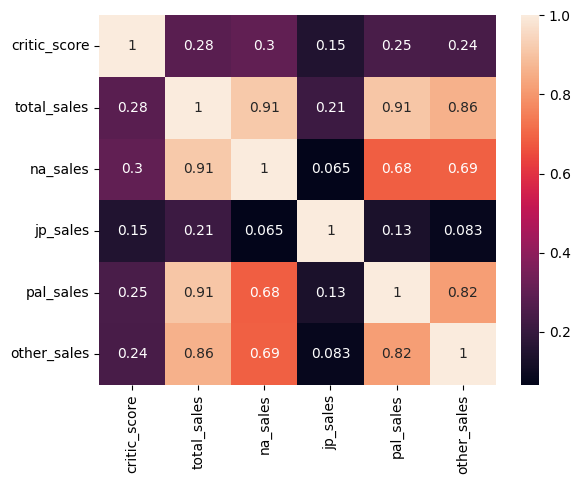

In [11]:
num_cols=data.select_dtypes(include='number').columns

matriz=data[num_cols].corr()

sns.heatmap(matriz,annot=True)

###Spliting and training tests:

###Bulding the Forest: Randomly selecting a subset of features(age, location)...
### Tree Growth: Grow each decision tree using the selected data and features.

###Making Predictions

##Model Training

In [13]:


# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

##Predictions_Evaluations

In [19]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

NameError: name 'X_test' is not defined